## Sales predction

#### Sales prediction involves forecasting the amount of a product that customer will purchase, taking into account various factors such as advertising expenditure, target audience segmentation, and advertising platform selection.

#### In business that offers products or services, the role of a data scientist is crucial for predicting future sales. They utilise machine learning techniques in python to analyse and interpret data, allowing them to make informed decisions regarding advertising costs. By leveraging these predictions, business can optimise their advertising strategies and maximise sales potential. Let’s embark on the journey of sales using machine in python.

### Importing Library

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Dataset

In [3]:
df = pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
df1 = df.copy()   # Making Copy

In [5]:
df.shape

(200, 4)

In [6]:
df.describe()  # describing statistical measures

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [7]:
df.dtypes   # checking datatypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

## Data Preprocessing

### a) Checking Null Values

In [8]:
df.isnull().sum()   # There is no null values in the data

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### b) Checking Duplicates

In [10]:
df.duplicated().sum() # There is no duplicate in the data

0

## Correlation

In [11]:
corr = df.corr()
corr

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


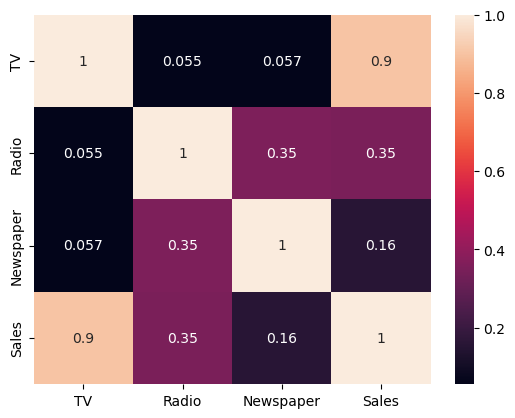

In [12]:
sns.heatmap(corr,annot=True)
plt.show()

### Inference 

#### 1) Sales is highly correlated with TV

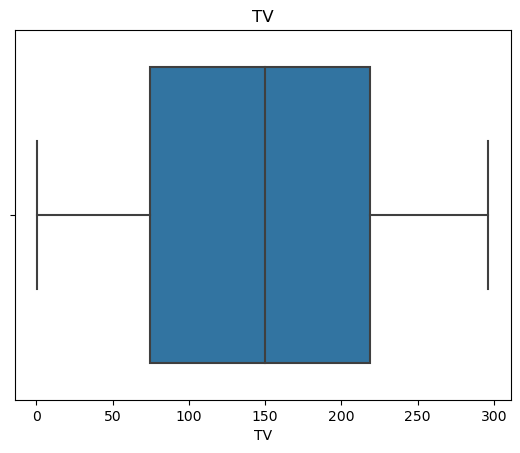

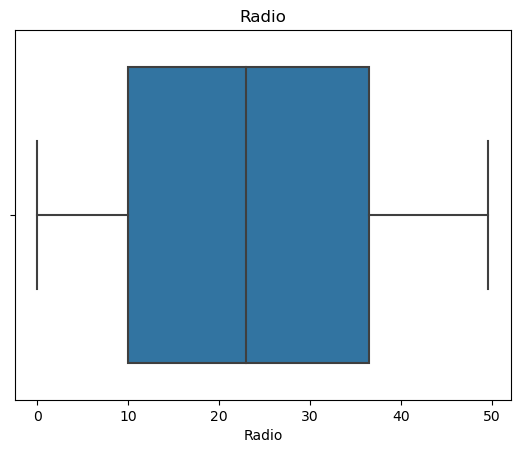

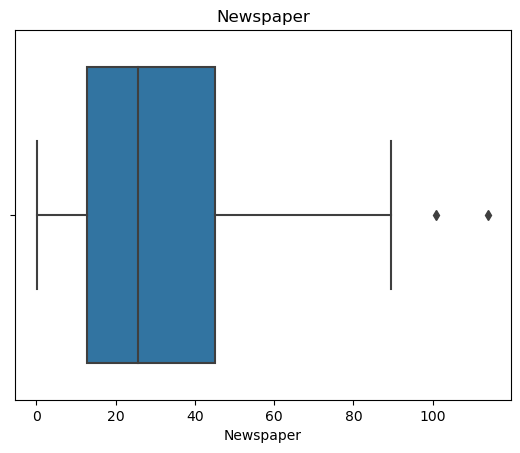

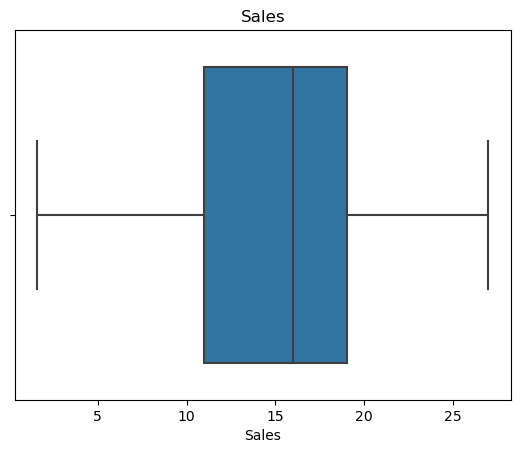

In [13]:
for i in df.columns:           # for checking outliers in the data
    plt.title(f'{i}')
    sns.boxplot(x=df[i])
    plt.show()

In [14]:
df.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,97%,98%,99%,max
TV,200.0,147.0425,85.854236,0.7,5.387,7.790,13.195,149.75,286.048,289.720,292.907,296.4
Radio,200.0,23.2640,14.846809,0.0,0.399,1.290,1.995,22.90,48.900,49.000,49.400,49.6
Newspaper,200.0,30.5540,21.778621,0.3,0.999,1.798,3.600,25.75,75.018,79.312,89.515,114.0
Sales,200.0,15.1305,5.283892,1.6,4.784,5.300,6.600,16.00,24.721,25.400,25.507,27.0


### Inference

#### 1) There are minimul no. of outliers

## For Outlier Treatment

In [15]:
lower_end = ['TV','Radio','Newspaper','Sales']
upper_end = ['TV','Radio','Newspaper','Sales']

In [16]:
def outlier_treatment_le(x):                 # Le = Lower end
    x = x.clip(lower=x.quantile(0.01))
    return x

def outlier_treatment_ue(x):                 # Ue = Upper end
    x = x.clip(upper=x.quantile(0.99))
    return x

In [17]:
df[lower_end] = df [lower_end].apply(outlier_treatment_le)
df[upper_end] = df [upper_end].apply(outlier_treatment_ue)

In [18]:
df.describe(percentiles=[0.01,0.02,0.05,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,5%,50%,97%,98%,99%,max
TV,200.0,147.05144,85.767860,5.387,5.39987,7.790,13.195,149.75,286.048,289.720,292.90007,292.907
Radio,200.0,23.26549,14.841149,0.399,0.39999,1.290,1.995,22.90,48.900,49.000,49.40000,49.400
Newspaper,200.0,30.37864,21.192412,0.999,0.99999,1.798,3.600,25.75,75.018,79.312,89.40115,89.515
Sales,200.0,15.14341,5.207534,4.784,4.79984,5.300,6.600,16.00,24.721,25.400,25.50007,25.507


#### Inference

#### 1) Now there is no outliers

### Check Linearity of independent features with target variable

<function matplotlib.pyplot.show(close=None, block=None)>

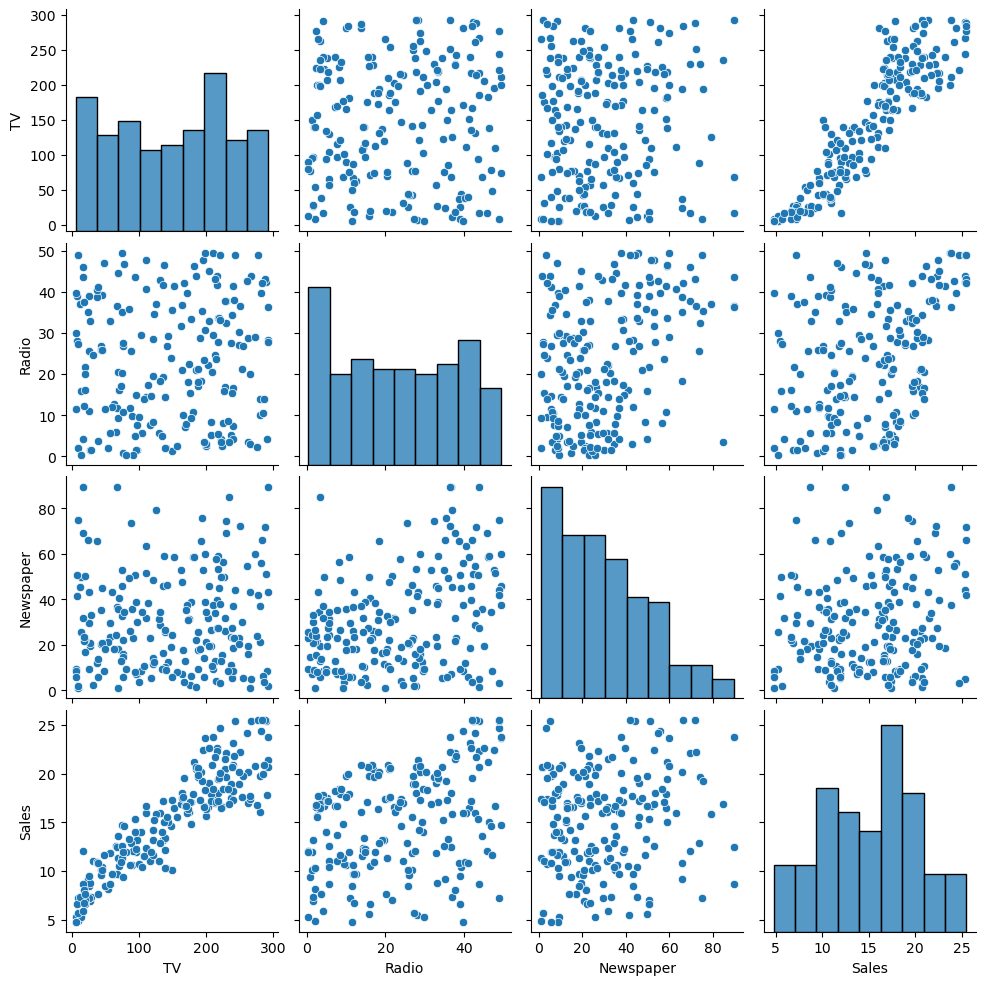

In [19]:
sns.pairplot(df)
plt.show

### Selecting X and Y

In [20]:
x = df.drop('Sales',axis=1)
y = df['Sales']
print(type(x))
print(type(y))
print(x.shape)
print(y.shape)

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
(200, 3)
(200,)


In [21]:
from sklearn.model_selection import train_test_split

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(140, 3)
(60, 3)
(140,)
(60,)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [29]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.9006691059524222
Test Score 0.9082495788566911


In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [32]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2 Score',r2s)
    
    
    
def mscore(model):
    print('Train Score',model.score(x_train,y_train))        # Train R2 score
    print('Test Score',model.score(x_test,y_test))

In [33]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 1.154383673842583
MSE 2.5667700233893793
RMSE 1.6021142354368427
R2 Score 0.9082495788566911


In [35]:
actual_ypred_lr1 = ypred_lr1

res_df = pd.DataFrame({'Actual_y_test':y_test,'Pred':actual_ypred_lr1})
res_df.head(20)

,Actual_y_test,Pred
95,16.9,17.130429
15,22.4,20.487257
30,21.4,23.554852
158,7.3,9.653896
128,24.7,21.643994
115,12.6,12.838252
69,22.3,21.071080
170,8.4,8.894856
174,16.5,17.090576
45,16.1,16.685093


## Summary

#### This is how using data analysis and machine learning algorithm, we have successfully able to predict sales <r>.